In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
import acquire
import prepare
import env

In [63]:
#Create a pandas dataframe, df_iris, from this data.

df_iris = data('iris')


In [64]:
df_iris = sns.load_dataset('iris')


In [65]:
#print the first 3 rows
df_iris.head(3)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [66]:
# print the number of rows and columns (shape)

df_iris.shape


(150, 5)

In [69]:
# print the column names
# print the data type of each column
df_iris.dtypes


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [68]:

# print the summary statistics for each of the numeric variables
df_iris.describe().T


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [70]:
#Read the data from this google sheet into a dataframe, df_google.


url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

In [71]:
# print the first 3 rows
df_google.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [72]:
# print the number of rows and columns
df_google.shape

(891, 12)

In [73]:
# print the column names
# print the data type of each column
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [74]:
# print the summary statistics for each of the numeric variables

df_google.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [83]:
# print the unique values for each of your categorical variables
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [87]:
# Download the previous exercise's file into an excel (File → Download → Microsoft Excel). 
# Read the downloaded file into a dataframe named df_excel.

df_excel = pd.read_excel('train.xlsx')


In [88]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)



In [89]:
# print the number of rows of your original dataframe
len(df_excel)


891

In [90]:
# print the first 5 column names
df_excel.columns[0:5]


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [91]:
# print the column names that have a data type of object
list(df_excel.select_dtypes(['object']).columns)


['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [97]:
# compute the range for each of the numeric variables.


In [67]:
df = acquire.get_titanic_data()


In [98]:
df.shape


(891, 14)

In [4]:
# first n rows

df.head(2)


,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    891 non-null    int64  
 1   passenger_id  891 non-null    int64  
 2   survived      891 non-null    int64  
 3   pclass        891 non-null    int64  
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   fare          891 non-null    float64
 9   embarked      889 non-null    object 
 10  class         891 non-null    object 
 11  deck          203 non-null    object 
 12  embark_town   889 non-null    object 
 13  alone         891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [6]:
df.describe()


,Unnamed: 0,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


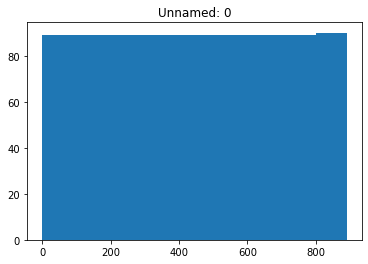

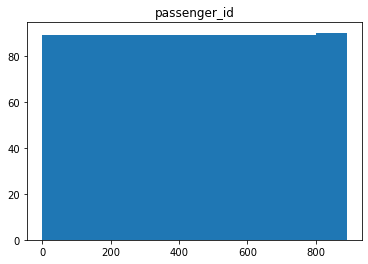

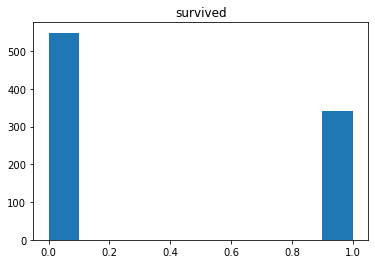

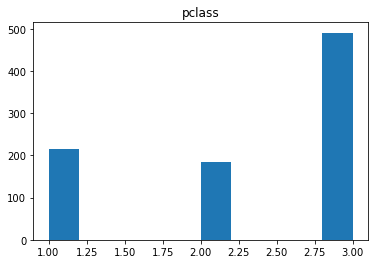

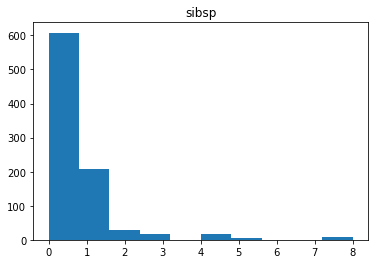

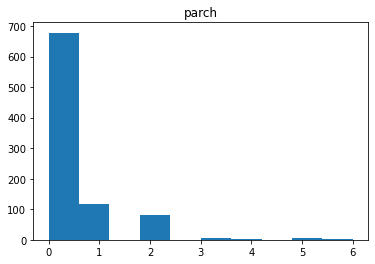

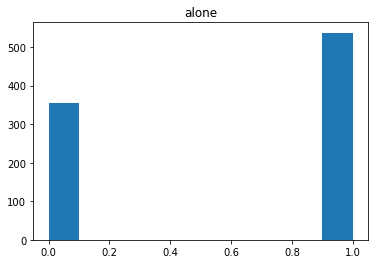

In [7]:
num_cols = df.columns[[df[col].dtype == 'int64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [8]:
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

male      577
female    314
Name: sex, dtype: int64
male      0.647587
female    0.352413
Name: sex, dtype: float64
----------------------
S    644
C    168
Q     77
Name: embarked, dtype: int64
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
----------------------
Third     491
First     216
Second    184
Name: class, dtype: int64
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
----------------------
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
----------------------
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtype: float64
----------------------


In [9]:
df.fare.value_counts(bins=5, sort=False)


(-0.513, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(307.398, 409.863]      0
(409.863, 512.329]      3
Name: fare, dtype: int64

In [10]:
missing = df.isnull().sum()
missing[missing > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [11]:
df = df.drop_duplicates()
df.shape

(891, 14)

In [12]:
cols_to_drop = ['deck', 'embarked', 'class', 'age']
df = df.drop(columns=cols_to_drop)
df.shape

(891, 10)

In [13]:
df.head(1)


,Unnamed: 0,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,0,3,male,1,0,7.25,Southampton,0


In [14]:
df['embark_town'] = df.embark_town.fillna(value='Southampton')


In [15]:
df.embark_town.isna().sum()


0

In [16]:
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])
dummy_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [17]:
df = pd.concat([df, dummy_df], axis=1)
df.head(1)

,Unnamed: 0,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,0,3,male,1,0,7.25,Southampton,0,1,0,1


In [18]:
def clean_data(df):
    '''
    This function will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'], fill missing embark_town with 'Southampton'
    and create dummy vars from sex and embark_town. 
    '''
    df = df.drop_duplicates()
    df = df.drop(columns=['deck', 'embarked', 'class', 'age'])
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [19]:
df2 = acquire.get_titanic_data()
df2.head(2)

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [20]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    891 non-null    int64  
 1   passenger_id  891 non-null    int64  
 2   survived      891 non-null    int64  
 3   pclass        891 non-null    int64  
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   fare          891 non-null    float64
 9   embarked      889 non-null    object 
 10  class         891 non-null    object 
 11  deck          203 non-null    object 
 12  embark_town   889 non-null    object 
 13  alone         891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [21]:
train, test = train_test_split(df2, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [22]:
# Validate my split.

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')


train -> (498, 14)
validate -> (214, 14)
test -> (179, 14)


In [23]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.survived)
    return train, validate, test


In [24]:
train, validate, test = split_data(df)


In [25]:
# Validate my split

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')


train -> (498, 13)
validate -> (214, 13)
test -> (179, 13)


In [26]:
# Get fresh Titanic data to use with missing values in embark_town again.

df3 = acquire.get_titanic_data()
df3.isnull().sum() [df3.isnull().sum() > 0]
df3.embark_town = df3.embark_town.fillna(value='Southampton')
df3.embark_town.value_counts(dropna=False)



Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [27]:
# ONLY look at train dataset after we split our data.
train, validate, test = split_data(df3)
train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    498 non-null    int64  
 1   passenger_id  498 non-null    int64  
 2   survived      498 non-null    int64  
 3   pclass        498 non-null    int64  
 4   sex           498 non-null    object 
 5   age           401 non-null    float64
 6   sibsp         498 non-null    int64  
 7   parch         498 non-null    int64  
 8   fare          498 non-null    float64
 9   embarked      497 non-null    object 
 10  class         498 non-null    object 
 11  deck          106 non-null    object 
 12  embark_town   498 non-null    object 
 13  alone         498 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 58.4+ KB


In [28]:
imputer = SimpleImputer(missing_values = None, strategy='most_frequent')


In [29]:
imputer = imputer.fit(train[['embark_town']])


In [30]:
train[['embark_town']] = imputer.transform(train[['embark_town']])

validate[['embark_town']] = imputer.transform(validate[['embark_town']])

test[['embark_town']] = imputer.transform(test[['embark_town']])


In [31]:
train.embark_town.value_counts(dropna=False)
 

Southampton    355
Cherbourg      102
Queenstown      41
Name: embark_town, dtype: int64

In [32]:
df4 = acquire.get_titanic_data()


In [33]:
def prep_titanic_data(df4):
    '''
    This function takes in a df and will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'], fill missing embark_town with 'Southampton'
    create dummy vars from sex and embark_town, and perform a train, validate, test split. 
    Returns train, validate, and test DataFrames
    '''
    df4 = clean_data(df4)
    train, validate, test = split_data(df4)
    return train, validate, test

In [34]:
# Run final prepare function and validate what that the function is working properly.

train, validate, test = prep_titanic_data(df4)
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               498 non-null    int64  
 1   passenger_id             498 non-null    int64  
 2   survived                 498 non-null    int64  
 3   pclass                   498 non-null    int64  
 4   sex                      498 non-null    object 
 5   sibsp                    498 non-null    int64  
 6   parch                    498 non-null    int64  
 7   fare                     498 non-null    float64
 8   embark_town              498 non-null    object 
 9   alone                    498 non-null    int64  
 10  sex_male                 498 non-null    uint8  
 11  embark_town_Queenstown   498 non-null    uint8  
 12  embark_town_Southampton  498 non-null    uint8  
dtypes: float64(1), int64(7), object(2), uint8(3)
memory usage: 44.3+ KB


# Using the Iris Data:

# Use the function defined in acquire.py to load the iris data.

In [35]:
iris_df = acquire.get_iris_data()
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      150 non-null    int64  
 1   species_id      150 non-null    int64  
 2   measurement_id  150 non-null    int64  
 3   sepal_length    150 non-null    float64
 4   sepal_width     150 non-null    float64
 5   petal_length    150 non-null    float64
 6   petal_width     150 non-null    float64
 7   species_name    150 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 9.5+ KB


# Drop the species_id and measurement_id columns.




In [36]:
iris_df = iris_df.drop(['species_id','measurement_id'], axis=1)

# Rename the species_name column to just species.



In [37]:
iris_df.rename(columns = {'species_name':'species'}, inplace = True)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Create dummy variables of the species name and concatenate onto 
# the iris dataframe. (This is for practice, we don't always have to 
# encode the target, but if we used species as a feature, we would need 
# to encode it).

#

In [38]:
dummy_iris_df= pd.get_dummies(iris_df.species)
dummy_iris_df

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [39]:
iris_con_df= pd.concat([iris_df, dummy_iris_df], axis=1)
iris_con_df

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,4,5.0,3.6,1.4,0.2,setosa,1,0,0
...,...,...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,virginica,0,0,1
146,146,6.3,2.5,5.0,1.9,virginica,0,0,1
147,147,6.5,3.0,5.2,2.0,virginica,0,0,1
148,148,6.2,3.4,5.4,2.3,virginica,0,0,1


In [40]:

train, test = train_test_split(iris_df, test_size=.2, 
                               random_state=123, stratify=iris_df.species)
train, validate = train_test_split(train, test_size=.25, 
                 random_state=123, stratify=train.species)

In [41]:
print(f'Prepared df: {iris_df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Prepared df: (150, 6)

Train: (90, 6)
Validate: (30, 6)
Test: (30, 6)


# Create a function named prep_iris that accepts the untransformed 
# iris data, and returns the data with the transformations above applied.

# Use the function defined in acquire.py to load the Titanic data.



In [42]:
titanic_df = acquire.get_titanic_data()
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    891 non-null    int64  
 1   passenger_id  891 non-null    int64  
 2   survived      891 non-null    int64  
 3   pclass        891 non-null    int64  
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   fare          891 non-null    float64
 9   embarked      889 non-null    object 
 10  class         891 non-null    object 
 11  deck          203 non-null    object 
 12  embark_town   889 non-null    object 
 13  alone         891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


# Drop any unnecessary, unhelpful, or duplicated columns.



In [43]:
titanic_df = titanic_df.drop(['Unnamed: 0','embark_town','class'], axis=1)
titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone
0,0,0,3,male,22.0,1,0,7.2500,S,NaN,0
1,1,1,1,female,38.0,1,0,71.2833,C,C,0
2,2,1,3,female,26.0,0,0,7.9250,S,NaN,1
3,3,1,1,female,35.0,1,0,53.1000,S,C,0
4,4,0,3,male,35.0,0,0,8.0500,S,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,NaN,1
887,887,1,1,female,19.0,0,0,30.0000,S,B,1
888,888,0,3,female,NaN,1,2,23.4500,S,NaN,0
889,889,1,1,male,26.0,0,0,30.0000,C,C,1


# Encode the categorical columns. Create dummy variables of the categorical
# columns and concatenate them onto the dataframe.



In [44]:
dummy_titanic_df= pd.get_dummies(titanic_df.sex)
dummy_titanic_df

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [45]:
con_titanic_df= pd.concat([titanic_df, dummy_titanic_df], axis=1)
con_titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone,female,male
0,0,0,3,male,22.0,1,0,7.2500,S,NaN,0,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,C,0,1,0
2,2,1,3,female,26.0,0,0,7.9250,S,NaN,1,1,0
3,3,1,1,female,35.0,1,0,53.1000,S,C,0,1,0
4,4,0,3,male,35.0,0,0,8.0500,S,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,NaN,1,0,1
887,887,1,1,female,19.0,0,0,30.0000,S,B,1,1,0
888,888,0,3,female,NaN,1,2,23.4500,S,NaN,0,1,0
889,889,1,1,male,26.0,0,0,30.0000,C,C,1,0,1


In [46]:

train, test = train_test_split(titanic_df, test_size=.2, 
                               random_state=123, stratify=titanic_df.survived)
train, validate = train_test_split(train, test_size=.25, 
                 random_state=123, stratify=train.survived)

In [47]:
print(f'Prepared df: {titanic_df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Prepared df: (891, 11)

Train: (534, 11)
Validate: (178, 11)
Test: (179, 11)


# Create a function named prep_titanic that accepts the raw titanic data, 
# and returns the data with the transformations above applied.

# Use the function defined in acquire.py to load the Telco data.



In [48]:
teleco_df = acquire.get_telco_data()
teleco_df.head(5)
#teleco_df.internet_service_type_id.nunique()


,Unnamed: 0,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,1,2,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,2,1,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


# Drop any unnecessary, unhelpful, or duplicated columns. 
# This could mean dropping foreign key columns but keeping the 
# corresponding string values, for example.



In [49]:
teleco_df=teleco_df.drop(['Unnamed: 0','internet_service_type_id','payment_type_id','contract_type_id'], axis=1)
teleco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,Mailed check,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,Mailed check,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Mailed check,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,Yes,No,No,No,55.15,742.9,No,One year,Mailed check,DSL
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Electronic check,Fiber optic
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,Mailed check,DSL
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,Mailed check,DSL


# Encode the categorical columns. Create dummy variables of the 
# categorical columns and concatenate them onto the dataframe.



In [50]:
dummy_teleco_df= pd.get_dummies(teleco_df[['gender','partner','dependents','phone_service']],drop_first=True)
dummy_teleco_df

,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes
0,0,1,1,1
1,1,0,0,1
2,1,0,0,1
3,1,1,0,1
4,0,1,0,1
...,...,...,...,...
7038,0,0,0,1
7039,1,1,0,1
7040,1,0,0,1
7041,1,1,1,1


In [51]:
con_teleco_df= pd.concat([teleco_df, dummy_teleco_df], axis=1)
con_teleco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,65.60,593.3,No,One year,Mailed check,DSL,0,1,1,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,59.90,542.4,No,Month-to-month,Mailed check,DSL,1,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,73.90,280.85,Yes,Month-to-month,Electronic check,Fiber optic,1,0,0,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,98.00,1237.85,Yes,Month-to-month,Electronic check,Fiber optic,1,1,0,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,83.90,267.4,Yes,Month-to-month,Mailed check,Fiber optic,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,55.15,742.9,No,One year,Mailed check,DSL,0,0,0,1
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,85.10,1873.7,Yes,Month-to-month,Electronic check,Fiber optic,1,1,0,1
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,50.30,92.75,No,Month-to-month,Mailed check,DSL,1,0,0,1
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,67.85,4627.65,No,Two year,Mailed check,DSL,1,1,1,1


In [52]:
train_teleco_df, test_teleco_df = train_test_split(teleco_df, test_size=.2, 
                               random_state=123, stratify=teleco_df.churn)
train_teleco_df, validate_teleco_df = train_test_split(train_teleco_df, test_size=.25, 
                 random_state=123, stratify=train_teleco_df.churn)

In [53]:
print(f'Prepared df: {teleco_df.shape}')
print()
print(f'Train: {train_teleco_df.shape}')
print(f'Validate: {validate_teleco_df.shape}')
print(f'Test: {test_teleco_df.shape}')

Prepared df: (7043, 21)

Train: (4225, 21)
Validate: (1409, 21)
Test: (1409, 21)


# Create a function named prep_telco that accepts the raw telco data,
# and returns the data with the transformations above applied.

# Read the data from the attendance table and calculate an attendance percentage 
# for each student. One half day is worth 50% of a full day, and 10 tardies is 
# equal to one absence.

In [63]:
attends=pd.read_csv("attendance.csv")
attends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4 non-null      object
 1   2018-01-01  4 non-null      object
 2   2018-01-02  4 non-null      object
 3   2018-01-03  4 non-null      object
 4   2018-01-04  4 non-null      object
 5   2018-01-05  4 non-null      object
 6   2018-01-06  4 non-null      object
 7   2018-01-07  4 non-null      object
 8   2018-01-08  4 non-null      object
dtypes: object(9)
memory usage: 416.0+ bytes


In [64]:
attends.rename(columns={'Unnamed: 0': 'Student'}, inplace=True)
attends

,Student,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [65]:
attends = attends.melt(id_vars = ['Student'])


attends.head()


,Student,variable,value
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


In [66]:
attends.rename(columns={'variable': 'date','value':'attendance'}, inplace=True)
attends

,Student,date,attendance
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T
5,Jane,2018-01-02,P
6,Billy,2018-01-02,T
7,John,2018-01-02,T
8,Sally,2018-01-03,T
9,Jane,2018-01-03,T


In [74]:
attends=attends.pivot_table(index=['Student'], columns='attendance', values='date', aggfunc='count').reset_index()


In [75]:
attends = attends.fillna(0.0)
attends

attendance,Student,A,H,P,T
0,Billy,3.0,1.0,1.0,3.0
1,Jane,2.0,0.0,1.0,5.0
2,John,0.0,1.0,5.0,2.0
3,Sally,1.0,1.0,2.0,4.0


In [108]:
attends['count'] = ((attends['T']*(9/10))+(attends.P) + (attends.H/2))/8
attends

attendance,Student,A,H,P,T,count
0,Billy,3.0,1.0,1.0,3.0,0.5250
1,Jane,2.0,0.0,1.0,5.0,0.6875
2,John,0.0,1.0,5.0,2.0,0.9125
3,Sally,1.0,1.0,2.0,4.0,0.7625


# Coffee Levels
Read the coffee_levels table.
* Transform the data so that each carafe is in it's own column.
* Is this the best shape for the data?

In [117]:
coffee=pd.read_csv("coffee_levels.csv")
coffee

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


In [118]:
coffee=coffee.pivot_table(index=['hour'], columns='coffee_carafe', values='coffee_amount')
coffee

coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


# Cake Recipes

# Read the cake_recipes table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.
# Tidy the data as necessary.
# Which recipe, on average, is the best? recipe b
# Which oven temperature, on average, produces the best results? 275
# Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [133]:
cake=pd.read_csv("cake_recipes.csv")
cake



,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [ ]:
cake

In [136]:
cake_s=cake['recipe:position'].str.split(':', expand=True)
split_cake = pd.concat([cake_s, cake], axis=1)
split_cake



,0,1,recipe:position,225,250,275,300
0,a,bottom,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a,top,a:top,51.709751,52.009735,68.576858,50.228470
2,b,bottom,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b,top,b:top,82.455004,95.224151,98.594881,58.169349
4,c,bottom,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c,top,c:top,71.306308,82.795477,92.098049,53.960273
6,d,bottom,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d,top,d:top,96.873178,76.101363,59.571620,50.971626


In [142]:
split_cake.rename(columns={0: 'Recipe',1:'Position'}, inplace=True)

split_cake

,Recipe,Position,recipe:position,225,250,275,300
0,a,bottom,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a,top,a:top,51.709751,52.009735,68.576858,50.228470
2,b,bottom,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b,top,b:top,82.455004,95.224151,98.594881,58.169349
4,c,bottom,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c,top,c:top,71.306308,82.795477,92.098049,53.960273
6,d,bottom,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d,top,d:top,96.873178,76.101363,59.571620,50.971626


In [143]:
cake=split_cake.drop(['recipe:position'], axis=1)
cake

,Recipe,Position,225,250,275,300
0,a,bottom,61.738655,53.912627,74.414730,98.786784
1,a,top,51.709751,52.009735,68.576858,50.228470
2,b,bottom,57.095320,61.904369,61.196980,99.248541
3,b,top,82.455004,95.224151,98.594881,58.169349
4,c,bottom,96.470207,52.001358,92.893227,65.473084
5,c,top,71.306308,82.795477,92.098049,53.960273
6,d,bottom,52.799753,58.670419,51.747686,56.183110
7,d,top,96.873178,76.101363,59.571620,50.971626


In [145]:
cake['Average'] = cake.mean(axis=1)
cake

,Recipe,Position,225,250,275,300,Average
0,a,bottom,61.738655,53.912627,74.414730,98.786784,72.213199
1,a,top,51.709751,52.009735,68.576858,50.228470,55.631204
2,b,bottom,57.095320,61.904369,61.196980,99.248541,69.861302
3,b,top,82.455004,95.224151,98.594881,58.169349,83.610846
4,c,bottom,96.470207,52.001358,92.893227,65.473084,76.709469
5,c,top,71.306308,82.795477,92.098049,53.960273,75.040027
6,d,bottom,52.799753,58.670419,51.747686,56.183110,54.850242
7,d,top,96.873178,76.101363,59.571620,50.971626,70.879447


In [151]:
cake[['Recipe','Average']].groupby('Recipe').agg('mean').idxmax()

Average    b
dtype: object

In [2]:
cake2=pd.read_csv("cake_recipes.csv")
cake2


,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [3]:
cake2=cake2.melt(id_vars=['recipe:position'])
cake2

,recipe:position,variable,value
0,a:bottom,225,61.738655
1,a:top,225,51.709751
2,b:bottom,225,57.095320
3,b:top,225,82.455004
4,c:bottom,225,96.470207
5,c:top,225,71.306308
6,d:bottom,225,52.799753
7,d:top,225,96.873178
8,a:bottom,250,53.912627
9,a:top,250,52.009735


In [5]:
cake2=cake2['recipe:position'].str.split(':', expand=True)
cake2

,0,1
0,a,bottom
1,a,top
2,b,bottom
3,b,top
4,c,bottom
5,c,top
6,d,bottom
7,d,top
8,a,bottom
9,a,top


In [5]:
iris=acquire.get_iris_data()
iris

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...,...
145,145,3,146,6.7,3.0,5.2,2.3,virginica
146,146,3,147,6.3,2.5,5.0,1.9,virginica
147,147,3,148,6.5,3.0,5.2,2.0,virginica
148,148,3,149,6.2,3.4,5.4,2.3,virginica


In [10]:
iris=prepare.prep_iris(iris)


In [17]:


train, val, test = prepare.train_validate_test_split(iris, 'species', seed=123)

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,4,5.0,3.6,1.4,0.2,setosa,1,0,0
...,...,...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,virginica,0,0,1
146,146,6.3,2.5,5.0,1.9,virginica,0,0,1
147,147,6.5,3.0,5.2,2.0,virginica,0,0,1
148,148,6.2,3.4,5.4,2.3,virginica,0,0,1


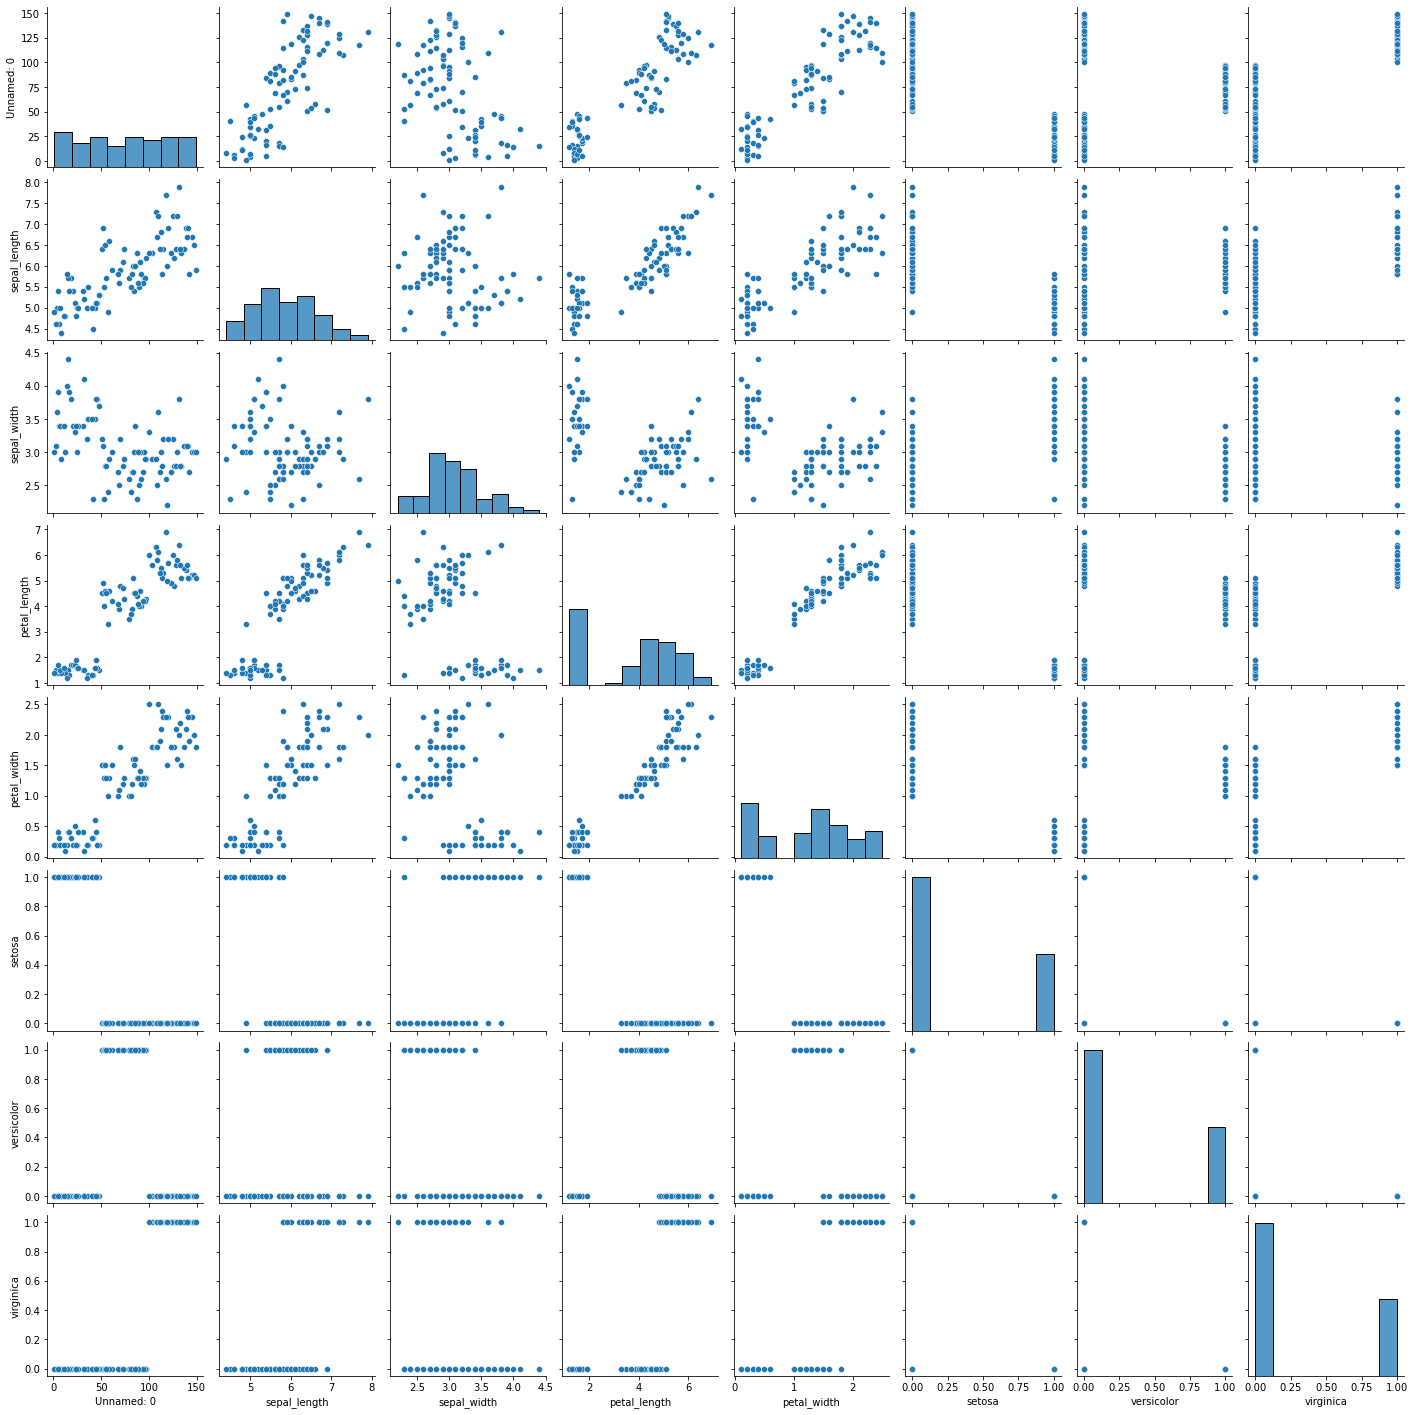

In [22]:
sns.pairplot(train)


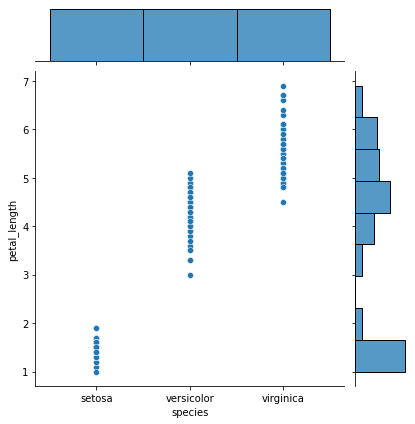

In [23]:
sns.jointplot(data=iris, x='species', y='petal_length')


In [24]:
sns.set_theme(style="dark")
'species', 'petal_length' = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

SyntaxError: cannot assign to literal (1753919293.py, line 2)

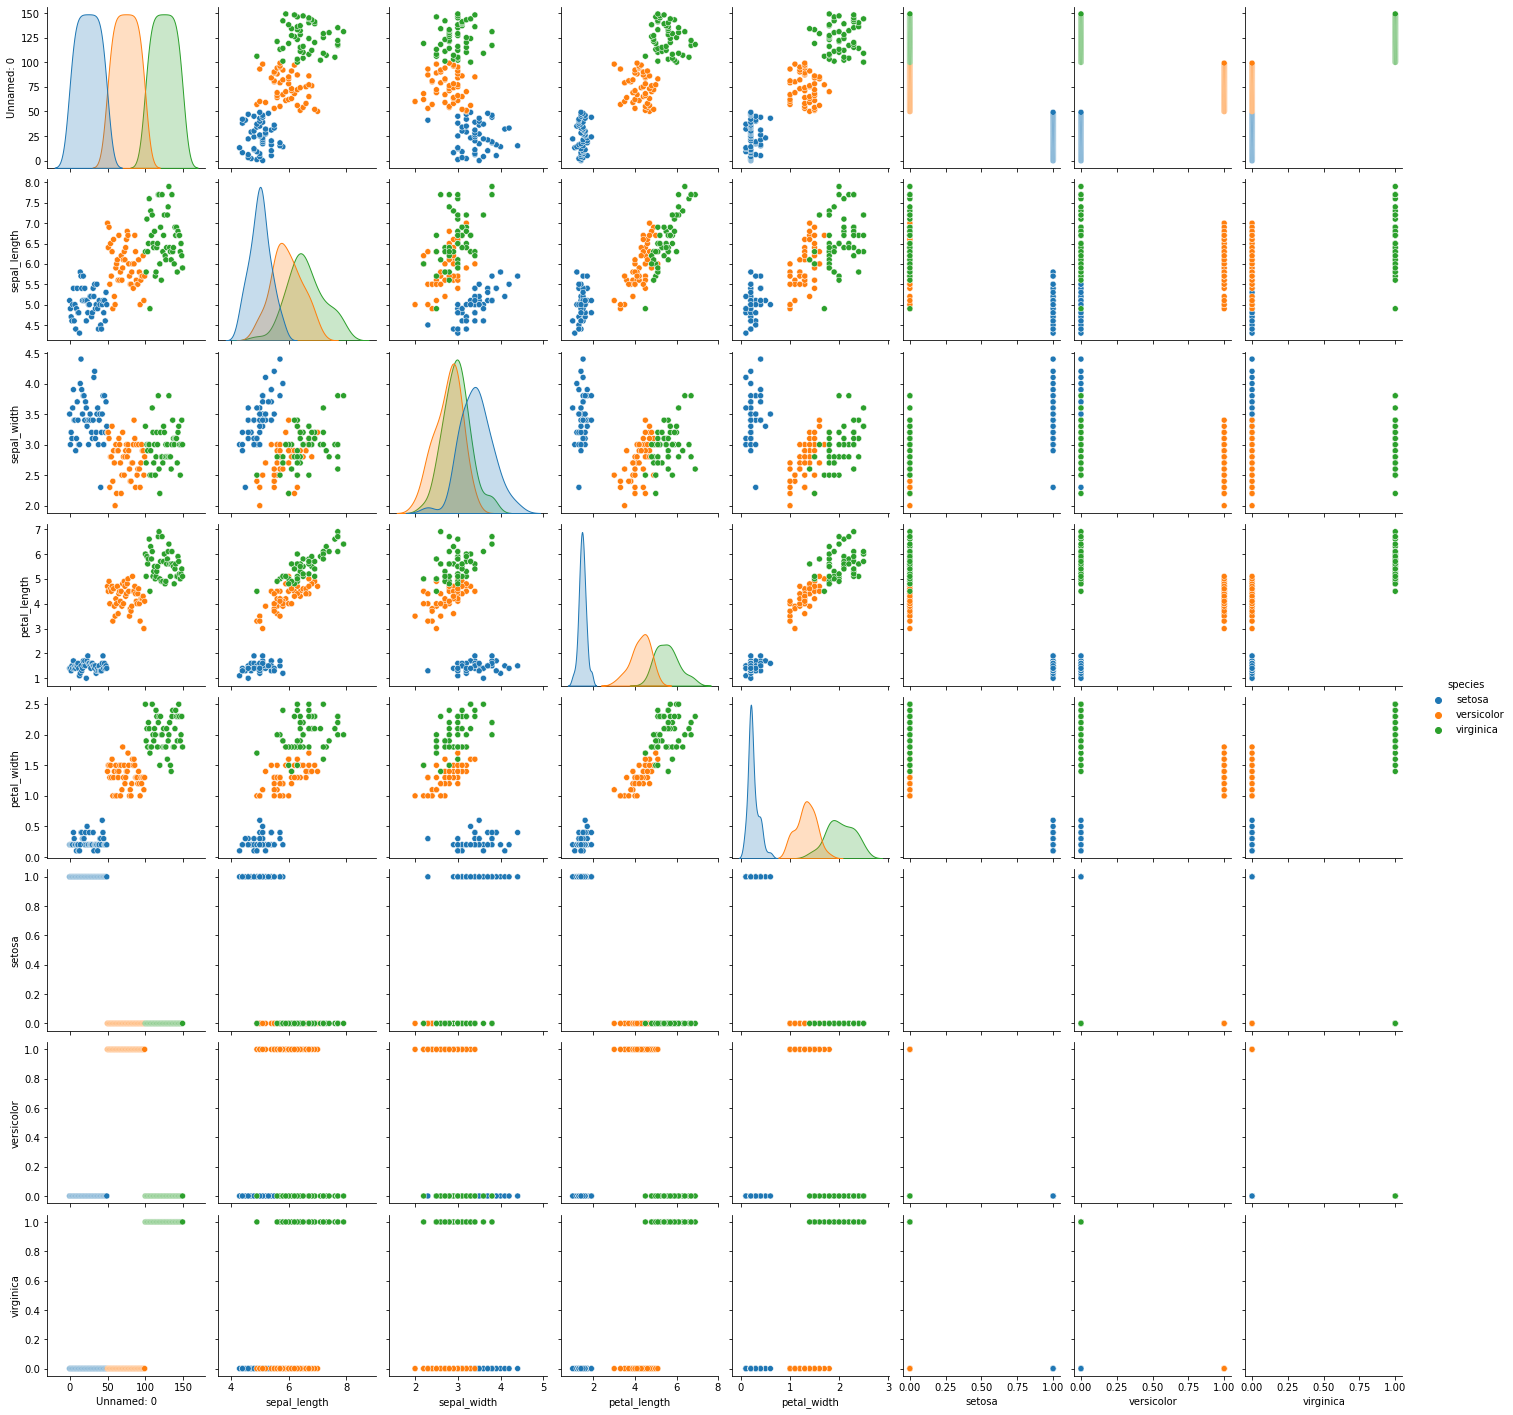

In [25]:
sns.pairplot(iris, hue="species")

[Text(0, 0.5, '')]

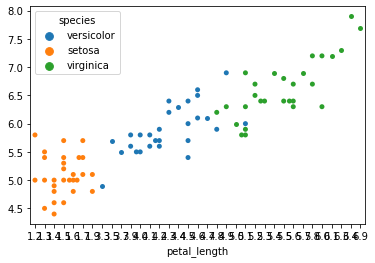

In [30]:
ax = sns.swarmplot(data=train, x="petal_length", y="sepal_length", hue="species")
ax.set(ylabel="")

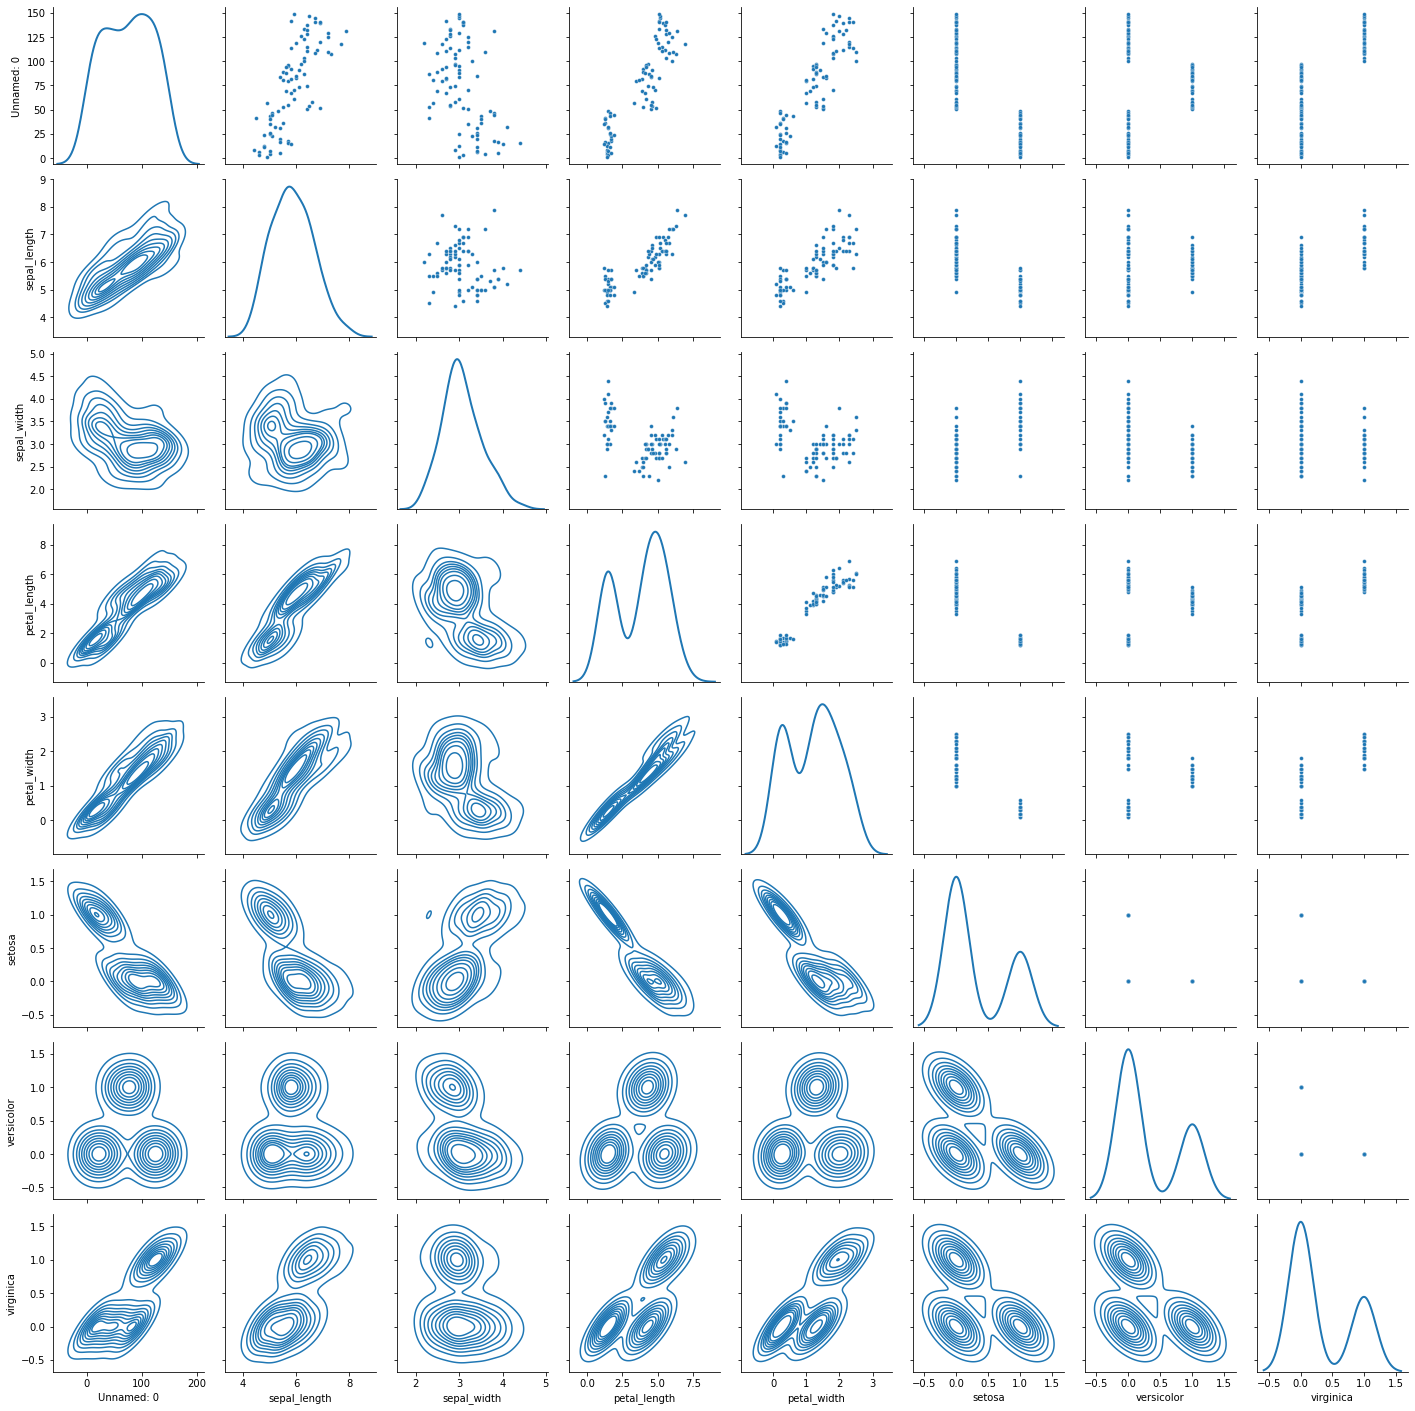

In [32]:
g = sns.PairGrid(train, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

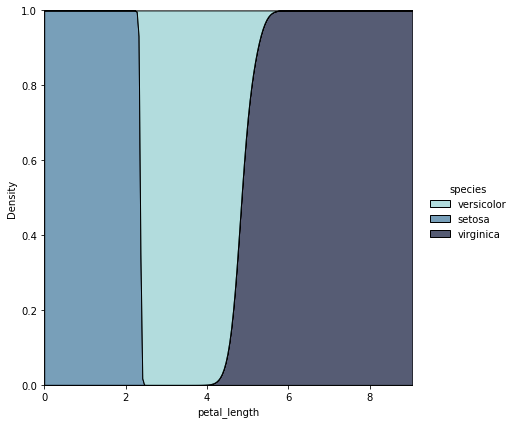

In [35]:
sns.displot(
    data=train,
  x="petal_length", hue="species",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",)

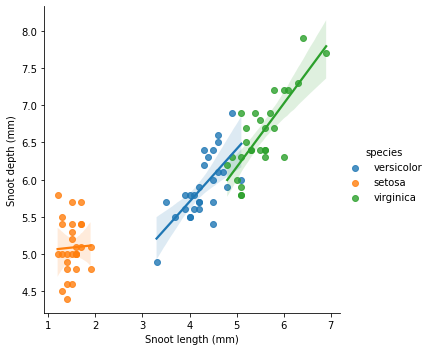

In [36]:
g = sns.lmplot(
    data=train,
   x="petal_length", y="sepal_length", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

In [40]:
churn=acquire.get_telco_data()
churn

,Unnamed: 0,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,Mailed check,DSL
1,1,1,2,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,Mailed check,DSL
2,2,2,1,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Mailed check,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,2,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,Mailed check,DSL
7039,7039,2,1,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Electronic check,Fiber optic
7040,7040,1,2,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,Mailed check,DSL
7041,7041,1,2,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,Mailed check,DSL


In [41]:

train, val, test = prepare.train_validate_test_split(churn, 'churn', seed=123)

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

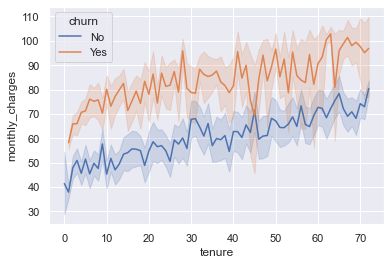

In [46]:
sns.set_theme(style="darkgrid")

sns.lineplot(x="tenure", y="monthly_charges",
             hue="churn", 
             data=churn)

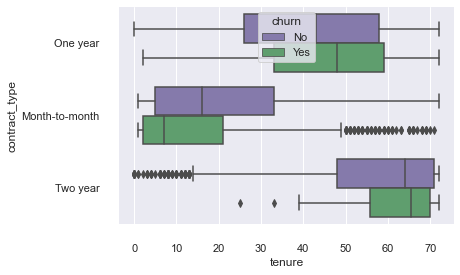

In [50]:
sns.boxplot(x="tenure", y="contract_type",
            hue="churn", palette=["m", "g"],
            data=churn)
sns.despine(offset=10, trim=True)

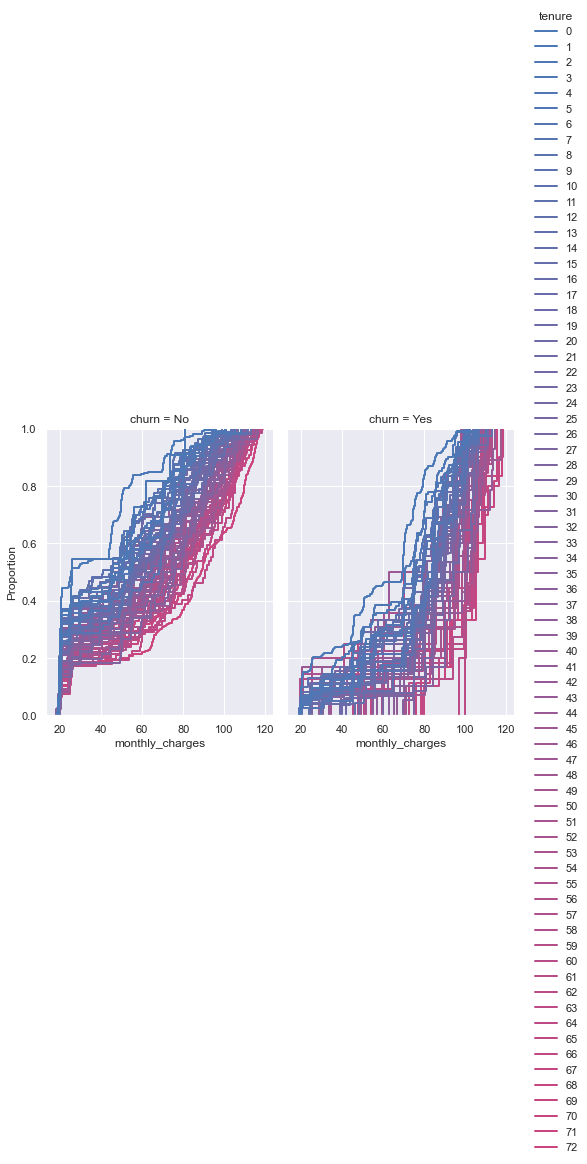

In [59]:
colors = (250, 70, 50), (350, 70, 50)
cmap = sns.blend_palette(colors, input="husl", as_cmap=True)
sns.displot(
    churn,
    x="monthly_charges", col="churn", hue="tenure",
    kind="ecdf", aspect=.75, linewidth=2, palette=cmap,
)